In [454]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


# **Data Load**

In [455]:
df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv',delimiter=',', header=None, skiprows=1, names=['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'])

# Exploratory Data Analysis

In [456]:
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4166,5917-RYRMG,Male,1,No,No,32,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.80,587.7,No
4356,3806-YAZOV,Female,0,No,No,3,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,18.80,56,No
648,5644-PDMZC,Female,1,No,No,2,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,No,Electronic check,89.50,161.5,Yes
6967,8739-WWKDU,Male,1,No,No,25,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,89.50,2196.15,Yes
608,8207-DMRVL,Male,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),114.55,8306.05,No
6810,7758-XKCBS,Male,0,No,No,15,No,No phone service,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Electronic check,29.70,438.25,Yes
1043,4883-QICIH,Male,0,Yes,Yes,32,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),69.75,2347.9,Yes
4633,1820-DJFPH,Female,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),24.05,1709.15,No
6483,3644-QXEHN,Male,0,Yes,Yes,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,97.00,1334.45,No
1004,7047-YXDMZ,Male,0,No,No,21,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.00,417.7,No


In [457]:
df = df.drop(['customerID'], axis = 1)

In [458]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


TotalCharges's column type must be numeric, but it was object. So I fixed this for visualization of numeric values.

In [459]:
df ["TotalCharges"]= pd.to_numeric(df["TotalCharges"], errors='coerce')

In [460]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [461]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

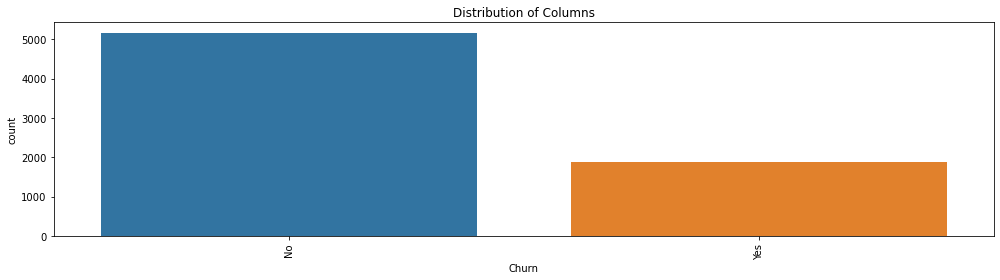

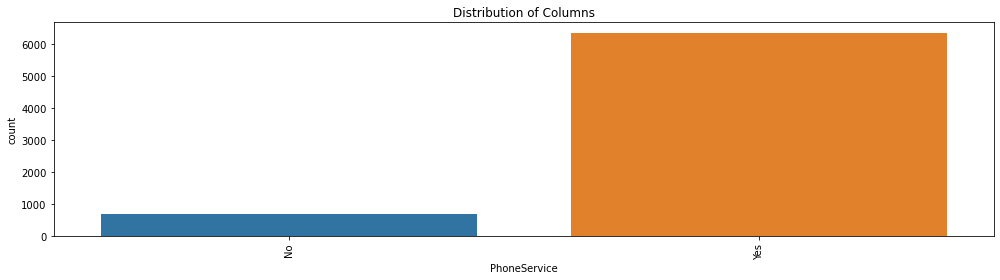

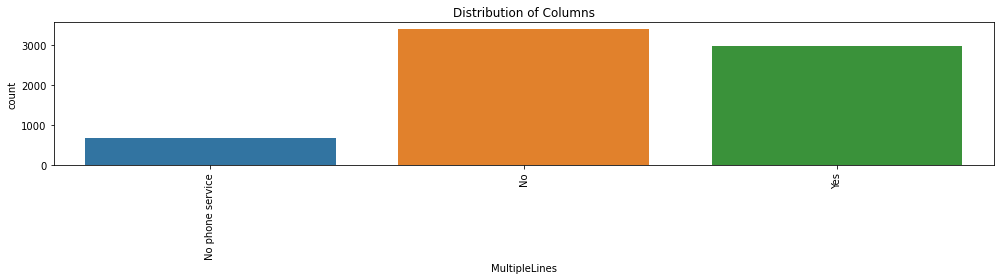

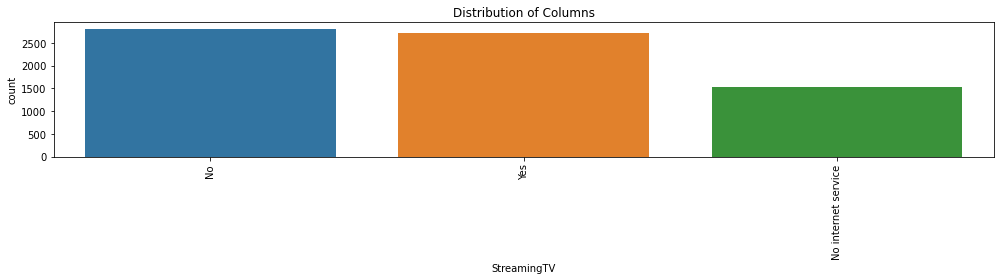

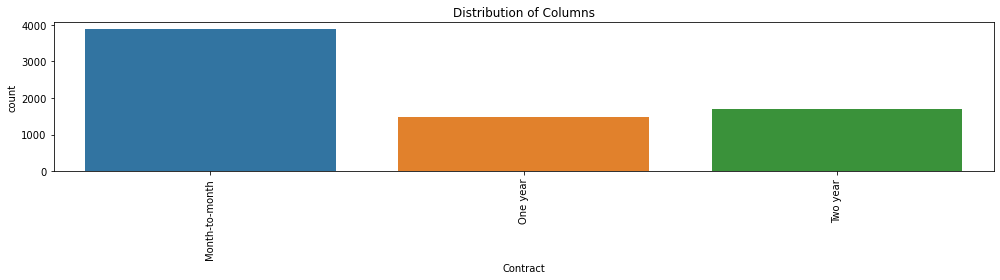

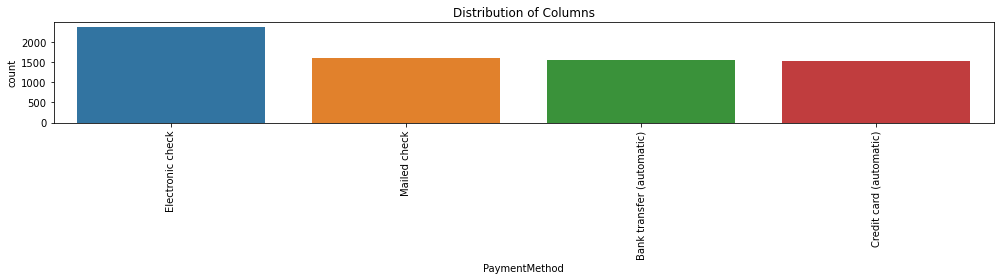

In [462]:
import matplotlib.pyplot as plt
import seaborn as sns
count = ["Churn","PhoneService","MultipleLines","StreamingTV","Contract","PaymentMethod"]
for i in count:
    plt.figure( figsize=(14, 4) )
    sns.countplot(i, data=df)
    plt.xticks(rotation=90)
    plt.title('Distribution of Columns')
    plt.tight_layout()
plt.show()

When I wanted to make a compare visualization of numerical values, different ranges of columns made it impossible. To prevent this I coded min max scaler function.

In [463]:
def rescale(data, new_min=0, new_max=1):
    return (data - data.min()) / (data.max() - data.min()) * (new_max - new_min) + new_min


columns = ['tenure','MonthlyCharges','TotalCharges','SeniorCitizen','Churn']
obj_cols = df[columns].select_dtypes(include=['object'])
num_cols = df[columns].select_dtypes(exclude=['object'])
num_cols = rescale(num_cols)
num_cols


,tenure,MonthlyCharges,TotalCharges,SeniorCitizen
0,0.013889,0.115423,0.001275,0.0
1,0.472222,0.385075,0.215867,0.0
2,0.027778,0.354229,0.010310,0.0
3,0.625000,0.239303,0.210241,0.0
4,0.027778,0.521891,0.015330,0.0
...,...,...,...,...
7038,0.333333,0.662189,0.227521,0.0
7039,1.000000,0.845274,0.847461,0.0
7040,0.152778,0.112935,0.037809,0.0
7041,0.055556,0.558706,0.033210,1.0


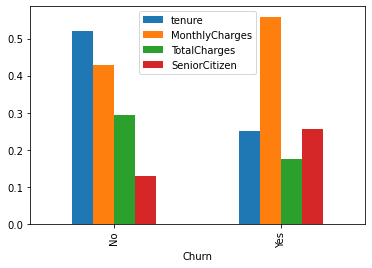

In [465]:
df_final = pd.concat([obj_cols, num_cols], axis=1,sort=False)
df_final.groupby('Churn').mean().plot.bar()
plt.show()

# Feature Engineering

Tenure, MonthlyCharges and TotalCharges are correlated, so I merged them, and reduced dimension for more succesfull prediction.

In [466]:
df["Monthly"] = df["TotalCharges"] / df ["tenure"]
drop_list1 = ["tenure","TotalCharges","MonthlyCharges"]
df = df.drop(drop_list1, axis = 1)

In [467]:
df

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,Monthly
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No,29.850000
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No,55.573529
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes,54.075000
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No,40.905556
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes,75.825000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No,82.937500
7039,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No,102.262500
7040,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No,31.495455
7041,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes,76.650000


**Handling with Categorical Values**

*All categoric column expect Churn encoded with one hot, only Churn encoded with Label Encoder.*

In [468]:
df['Churn'] = df['Churn'].astype("category")
df['Churn'] = df['Churn'].cat.codes
obj_cols1 = df.select_dtypes(include=['object'])
num_cols1 =df.select_dtypes(exclude=['object'])

obj = pd.get_dummies(obj_cols1, columns=obj_cols1.columns)
obj

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,0,1,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,0,1,1,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,1,1,0,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,1,1,0,1,0,1,0,0,1,...,0,0,1,0,1,0,1,0,0,0
4,1,0,1,0,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,0,1,0,1,0,1,0,0,...,1,0,1,0,0,1,0,0,0,1
7039,1,0,0,1,0,1,0,1,0,0,...,1,0,1,0,0,1,0,1,0,0
7040,1,0,0,1,0,1,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
7041,0,1,0,1,1,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1


In [469]:
df = pd.concat([obj, num_cols1], axis=1,sort=False)

In [470]:
cor = df.corr()
a = cor["Churn"].sort_values(ascending=False)

In [471]:
a

Churn                                      1.000000
Contract_Month-to-month                    0.405103
OnlineSecurity_No                          0.342637
TechSupport_No                             0.337281
InternetService_Fiber optic                0.308020
PaymentMethod_Electronic check             0.301919
OnlineBackup_No                            0.268005
DeviceProtection_No                        0.252481
Monthly                                    0.192033
PaperlessBilling_Yes                       0.191825
Dependents_No                              0.164221
SeniorCitizen                              0.150889
Partner_No                                 0.150448
StreamingMovies_No                         0.130845
StreamingTV_No                             0.128916
StreamingTV_Yes                            0.063228
StreamingMovies_Yes                        0.061382
MultipleLines_Yes                          0.040102
PhoneService_Yes                           0.011942
gender_Femal

Dropped most meaningless columns for prediction.

In [472]:
droplist2 = ['gender_Female','gender_Male','MultipleLines_No phone service', 'MultipleLines_No','MultipleLines_Yes','PhoneService_Yes','PhoneService_No']
df.drop(droplist2 ,axis = 1,inplace = True)

In [473]:
df

,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,Churn,Monthly
0,0,1,1,0,1,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,29.850000
1,1,0,1,0,1,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,55.573529
2,1,0,1,0,1,0,0,0,0,1,...,0,0,1,0,0,0,1,0,1,54.075000
3,1,0,1,0,1,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,40.905556
4,1,0,1,0,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0,1,75.825000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,0,1,1,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,82.937500
7039,0,1,0,1,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,102.262500
7040,0,1,0,1,1,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,31.495455
7041,0,1,1,0,0,1,0,1,0,0,...,0,0,1,0,0,0,1,1,1,76.650000


In [474]:
df.isna().sum()

Partner_No                                  0
Partner_Yes                                 0
Dependents_No                               0
Dependents_Yes                              0
InternetService_DSL                         0
InternetService_Fiber optic                 0
InternetService_No                          0
OnlineSecurity_No                           0
OnlineSecurity_No internet service          0
OnlineSecurity_Yes                          0
OnlineBackup_No                             0
OnlineBackup_No internet service            0
OnlineBackup_Yes                            0
DeviceProtection_No                         0
DeviceProtection_No internet service        0
DeviceProtection_Yes                        0
TechSupport_No                              0
TechSupport_No internet service             0
TechSupport_Yes                             0
StreamingTV_No                              0
StreamingTV_No internet service             0
StreamingTV_Yes                   

In [475]:
df['Monthly'].fillna(value=df['Monthly'].mean(), inplace=True)

In [476]:
df.isna().sum()

Partner_No                                 0
Partner_Yes                                0
Dependents_No                              0
Dependents_Yes                             0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineSecurity_No                          0
OnlineSecurity_No internet service         0
OnlineSecurity_Yes                         0
OnlineBackup_No                            0
OnlineBackup_No internet service           0
OnlineBackup_Yes                           0
DeviceProtection_No                        0
DeviceProtection_No internet service       0
DeviceProtection_Yes                       0
TechSupport_No                             0
TechSupport_No internet service            0
TechSupport_Yes                            0
StreamingTV_No                             0
StreamingTV_No internet service            0
StreamingTV_Yes                            0
StreamingM

In [477]:
cor = df.corr()
a = cor["Churn"].sort_values(ascending=False)
a

Churn                                      1.000000
Contract_Month-to-month                    0.405103
OnlineSecurity_No                          0.342637
TechSupport_No                             0.337281
InternetService_Fiber optic                0.308020
PaymentMethod_Electronic check             0.301919
OnlineBackup_No                            0.268005
DeviceProtection_No                        0.252481
Monthly                                    0.191978
PaperlessBilling_Yes                       0.191825
Dependents_No                              0.164221
SeniorCitizen                              0.150889
Partner_No                                 0.150448
StreamingMovies_No                         0.130845
StreamingTV_No                             0.128916
StreamingTV_Yes                            0.063228
StreamingMovies_Yes                        0.061382
DeviceProtection_Yes                      -0.066160
OnlineBackup_Yes                          -0.082255
PaymentMetho

# Preparing Data for ML

In [478]:
X = df.drop(['Churn'], axis = 1)
Y = df['Churn']

In [492]:
X = rescale(X)
X

,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,Monthly
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.149361
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.388372
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.374448
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.252084
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.576539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.642625
7039,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.822184
7040,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.164650
7041,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.584204


In [489]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.20, random_state = 14)

In [493]:
x_train.isna().sum()

Partner_No                                 0
Partner_Yes                                0
Dependents_No                              0
Dependents_Yes                             0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineSecurity_No                          0
OnlineSecurity_No internet service         0
OnlineSecurity_Yes                         0
OnlineBackup_No                            0
OnlineBackup_No internet service           0
OnlineBackup_Yes                           0
DeviceProtection_No                        0
DeviceProtection_No internet service       0
DeviceProtection_Yes                       0
TechSupport_No                             0
TechSupport_No internet service            0
TechSupport_Yes                            0
StreamingTV_No                             0
StreamingTV_No internet service            0
StreamingTV_Yes                            0
StreamingM

# Model Choosing

In [534]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
models = []
models.append(('Logistic Regression', LogisticRegression(max_iter=250)))
models.append(('Naive Bayes', GaussianNB()))
models.append(('Decision Tree (CART)',DecisionTreeClassifier())) 
models.append(('K-NN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
models.append(('AdaBoostClassifier', AdaBoostClassifier()))
models.append(('BaggingClassifier', BaggingClassifier()))
models.append(('RandomForestClassifier', RandomForestClassifier()))
models.append(('XGB',xgb.XGBClassifier()))

In [535]:
for name, model in models:
    model = model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    from sklearn import metrics
    print("Model -> %s -> ACC: %%%.2f" % (name,metrics.accuracy_score(y_test, y_pred)*100))

Model -> Logistic Regression -> ACC: %79.13
Model -> Naive Bayes -> ACC: %67.07
Model -> Decision Tree (CART) -> ACC: %71.33
Model -> K-NN -> ACC: %74.59
Model -> SVM -> ACC: %75.37
Model -> AdaBoostClassifier -> ACC: %78.57
Model -> BaggingClassifier -> ACC: %75.44
Model -> RandomForestClassifier -> ACC: %75.51
Model -> XGB -> ACC: %77.29


Most Succesfull model is Logistic Regression, so I will continue with that.

**Determining for Best Parametres**

 0.7877187181134501

In [554]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={'max_iter': [100,125, 150,190],
         'C':[200, 400,800,900,950,1000,1010,1200], 'penalty':['l1', 'l2', 'elasticnet', 'none'], 'solver' :['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10,  n_jobs=-1, verbose=1)
logreg_cv.fit(x_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

Fitting 10 folds for each of 640 candidates, totalling 6400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 480 tasks      | elapsed:   25.8s
[Parallel(n_jobs=-1)]: Done 1088 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1894 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 2880 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 4268 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 5624 tasks      | elapsed:  6.1min


tuned hpyerparameters :(best parameters)  {'C': 1000, 'max_iter': 150, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.7877187181134501


[Parallel(n_jobs=-1)]: Done 6400 out of 6400 | elapsed:  6.9min finished


In [571]:
logregfinal=LogisticRegression(C= 1000, max_iter = 150, solver = 'lbfgs')
logregfinal.fit(x_train,y_train)
score = logregfinal.score(x_test, y_test)
prediction_test = logregfinal.predict(x_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.7913413768630234
